In [76]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [77]:
df=pd.read_csv("iris.csv")

In [78]:
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [79]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [80]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [81]:
df.dtypes

sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
species          object
dtype: object

In [82]:
df.shape

(150, 5)

In [83]:
df["species"].unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [84]:
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [85]:
# To remove ID column
# df.drop("ID",inplace=True,axis=1)

<Axes: >

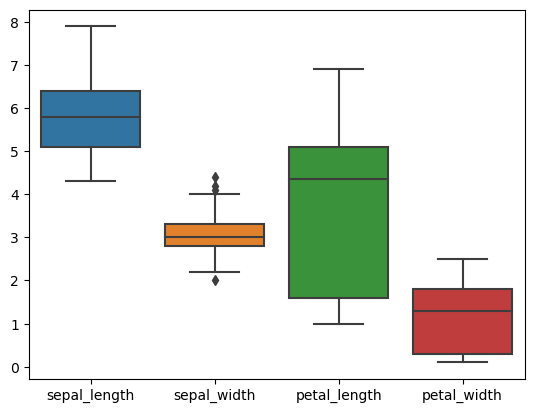

In [86]:
sns.boxplot(data=df)

In [87]:
def remove_outliers(name:str):
    global df
    q3,q1=np.percentile(df[name],[75,25])
    iqr=q3-q1
    df=df[(df[name]>=(q1-(1.5*iqr)))&(df[name]<=(q3+(1.5*iqr)))]
remove_outliers("sepal_width")

<Axes: >

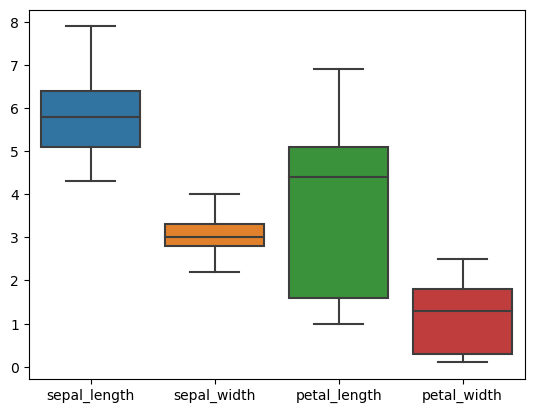

In [88]:
sns.boxplot(data=df)

In [89]:
df.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

In [90]:
from sklearn.model_selection import train_test_split
x=df[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']]
y=df['species']

In [91]:
print(x)

     sepal_length  sepal_width  petal_length  petal_width
0             5.1          3.5           1.4          0.2
1             4.9          3.0           1.4          0.2
2             4.7          3.2           1.3          0.2
3             4.6          3.1           1.5          0.2
4             5.0          3.6           1.4          0.2
..            ...          ...           ...          ...
145           6.7          3.0           5.2          2.3
146           6.3          2.5           5.0          1.9
147           6.5          3.0           5.2          2.0
148           6.2          3.4           5.4          2.3
149           5.9          3.0           5.1          1.8

[146 rows x 4 columns]


In [92]:
x.shape

(146, 4)

In [93]:
print(y)

0         setosa
1         setosa
2         setosa
3         setosa
4         setosa
         ...    
145    virginica
146    virginica
147    virginica
148    virginica
149    virginica
Name: species, Length: 146, dtype: object


In [94]:
y.shape

(146,)

In [95]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=1)

In [96]:
x_train

,sepal_length,sepal_width,petal_length,petal_width
4,5.0,3.6,1.4,0.2
98,5.1,2.5,3.0,1.1
42,4.4,3.2,1.3,0.2
39,5.1,3.4,1.5,0.2
117,7.7,3.8,6.7,2.2
...,...,...,...,...
137,6.4,3.1,5.5,1.8
141,6.9,3.1,5.1,2.3
76,6.8,2.8,4.8,1.4
144,6.7,3.3,5.7,2.5


In [97]:
x_test

,sepal_length,sepal_width,petal_length,petal_width
102,7.1,3.0,5.9,2.1
70,5.9,3.2,4.8,1.8
56,6.3,3.3,4.7,1.6
79,5.7,2.6,3.5,1.0
125,7.2,3.2,6.0,1.8
78,6.0,2.9,4.5,1.5
123,6.3,2.7,4.9,1.8
132,6.4,2.8,5.6,2.2
47,4.6,3.2,1.4,0.2
62,6.0,2.2,4.0,1.0


In [98]:
y_train

4          setosa
98     versicolor
42         setosa
39         setosa
117     virginica
          ...    
137     virginica
141     virginica
76     versicolor
144     virginica
40         setosa
Name: species, Length: 102, dtype: object

In [99]:
y_test

102     virginica
70     versicolor
56     versicolor
79     versicolor
125     virginica
78     versicolor
123     virginica
132     virginica
47         setosa
62     versicolor
5          setosa
17         setosa
94     versicolor
14         setosa
101     virginica
36         setosa
131     virginica
30         setosa
134     virginica
38         setosa
77     versicolor
87     versicolor
34         setosa
126     virginica
51     versicolor
20         setosa
145     virginica
120     virginica
96     versicolor
82     versicolor
128     virginica
54     versicolor
45         setosa
112     virginica
29         setosa
43         setosa
108     virginica
48         setosa
18         setosa
73     versicolor
81     versicolor
57     versicolor
114     virginica
19         setosa
Name: species, dtype: object

In [100]:
from sklearn.naive_bayes import GaussianNB
model=GaussianNB()
model.fit(x_train,y_train)
y_pred=model.predict(x_test)

In [101]:
y_pred

array(['virginica', 'virginica', 'versicolor', 'versicolor', 'virginica',
       'versicolor', 'virginica', 'virginica', 'setosa', 'versicolor',
       'setosa', 'setosa', 'versicolor', 'setosa', 'virginica', 'setosa',
       'virginica', 'setosa', 'versicolor', 'setosa', 'virginica',
       'versicolor', 'setosa', 'virginica', 'versicolor', 'setosa',
       'virginica', 'virginica', 'versicolor', 'versicolor', 'virginica',
       'versicolor', 'setosa', 'virginica', 'setosa', 'setosa',
       'virginica', 'setosa', 'setosa', 'versicolor', 'versicolor',
       'versicolor', 'virginica', 'setosa'], dtype='<U10')

In [102]:
model.score(x_train,y_train)

0.9705882352941176

In [103]:
model.score(x_test,y_test)

0.9318181818181818

In [104]:
from sklearn.metrics import confusion_matrix,classification_report

In [105]:
cm=confusion_matrix(y_test,y_pred)
cm

array([[15,  0,  0],
       [ 0, 13,  2],
       [ 0,  1, 13]])

In [106]:
class_labels=['setosa', 'versicolor', 'virginica']

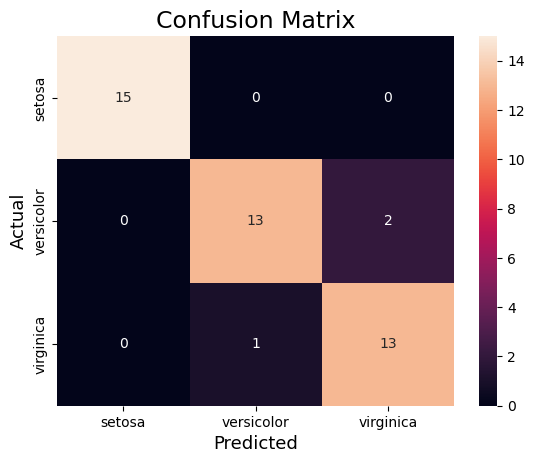

In [107]:
sns.heatmap(cm,annot=True,xticklabels=class_labels,yticklabels=class_labels)
plt.xlabel("Predicted",fontsize=13)
plt.ylabel("Actual",fontsize=13)
plt.title("Confusion Matrix",fontsize=17)
plt.show()

In [108]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        15
  versicolor       0.93      0.87      0.90        15
   virginica       0.87      0.93      0.90        14

    accuracy                           0.93        44
   macro avg       0.93      0.93      0.93        44
weighted avg       0.93      0.93      0.93        44



In [109]:
#setosa
print("Setosa")
TP1=cm[0][0]
FP1=cm[1][0]+cm[2][0]
FN1=cm[0][1]+cm[0][2]
TN1=cm[1][1]+cm[2][2]+cm[1][2]+cm[2][1]+cm[1][2]
print("TP1=",TP1)
print("FP1=",FP1)
print("FN1=",FN1)
print("TN1=",TN1)
acc=(TP1+TN1)/(TP1+TN1+FP1+FN1)
print("Accuracy=",acc)
print("Error Rate="+str(1-acc))
pre=(TP1)/(TP1+FP1)
print("Precison=",pre)
rec=(TP1)/(TP1+FN1)
print("Recall=",rec)
f1=(2*pre*rec)/(rec+pre)
print("F1 Score=",f1)

Setosa
TP1= 15
FP1= 0
FN1= 0
TN1= 31
Accuracy= 1.0
Error Rate=0.0
Precison= 1.0
Recall= 1.0
F1 Score= 1.0


In [110]:
#versicolor
print("Versicolor")
TP1=cm[1][1]
FP1=cm[0][1]+cm[2][1]
TN1=cm[0][0]+cm[0][2]+cm[2][0]+cm[2][2]
FN1=cm[1][0]+cm[1][2]
print("TP2=",TP1)
print("FP2=",FP1)
print("FN2=",FN1)
print("TN2=",TN1)
acc=(TP1+TN1)/(TP1+TN1+FP1+FN1)
print("Accuracy=",acc)
print("Error Rate="+str(1-acc))
pre=(TP1)/(TP1+FP1)
print("Precison=",pre)
rec=(TP1)/(TP1+FN1)
print("Recall=",rec)
f1=(2*pre*rec)/(rec+pre)
print("F1 Score=",f1)

Versicolor
TP2= 13
FP2= 1
FN2= 2
TN2= 28
Accuracy= 0.9318181818181818
Error Rate=0.06818181818181823
Precison= 0.9285714285714286
Recall= 0.8666666666666667
F1 Score= 0.896551724137931


In [111]:
#viginica
print("Virginica")
TP1=cm[2][2]
FP1=cm[0][2]+cm[1][2]
TN1=cm[0][0]+cm[0][1]+cm[1][0]+cm[1][1]
FN1=cm[2][0]+cm[2][1]
print("TP3=",TP1)
print("FP3=",FP1)
print("FN3=",FN1)
print("TN3=",TN1)
acc=(TP1+TN1)/(TP1+TN1+FP1+FN1)
print("Accuracy=",acc)
print("Error Rate="+str(1-acc))
pre=(TP1)/(TP1+FP1)
print("Precison=",pre)
rec=(TP1)/(TP1+FN1)
print("Recall=",rec)
f1=(2*pre*rec)/(rec+pre)
print("F1 Score=",f1)

Virginica
TP3= 13
FP3= 2
FN3= 1
TN3= 28
Accuracy= 0.9318181818181818
Error Rate=0.06818181818181823
Precison= 0.8666666666666667
Recall= 0.9285714285714286
F1 Score= 0.896551724137931
